Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

from data.stathinpy import draw_bs_reps_ind

pd.set_option('display.max_columns', 100)
sns.set()
sns.set_style("white")
np.random.seed(42)

%matplotlib inline

#### Read data

In [2]:
df = pd.read_csv('../data/processed/wound_outcomes.csv')

#### Value counts for ИСХОД

In [3]:
df['ИСХОД'].value_counts()

0    570
1     48
Name: ИСХОД, dtype: int64

#### Bootstrap replicates and confidence interval for Outcome share

In [4]:
# Draw 100000 bootstrap replicates of outcomes ('ИСХОД') mean

data = df['ИСХОД'].values
bs_outcome_reps = draw_bs_reps_ind(data, np.mean, size=100000)

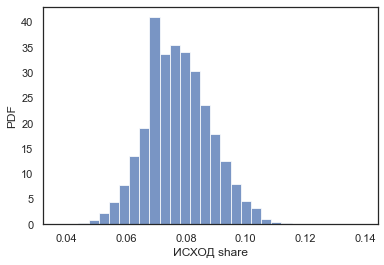

95% confidence interval for ИСХОД share
[0.0566343 0.0987055]


In [5]:
_ = plt.hist(bs_outcome_reps, bins=30, density=True, alpha=0.75)
_ = plt.xlabel('ИСХОД share')
_ = plt.ylabel('PDF')
plt.show()

print('95% confidence interval for ИСХОД share' )
print(np.percentile(bs_outcome_reps, [2.5, 97.5]))


#### Outcome share (fraction of 1s), outcome sum, and size
 
grouped by ``Сумма баллов``

In [6]:
df.groupby(['Сумма баллов']).agg(outcome_share=('ИСХОД','mean'), outcome_sum=('ИСХОД','sum'), count=('ИСХОД','size'))

,outcome_share,outcome_sum,count
Сумма баллов,,,
0,0.051724,3,58
1,0.049689,8,161
2,0.121951,20,164
3,0.070064,11,157
4,0.047619,3,63
5,0.200000,3,15


In [7]:
cname = 'Ожирение'
data = df.groupby([cname]).agg(outcome_share=('ИСХОД','mean'), 
                                    outcome_sum=('ИСХОД','sum'), 
                                    count=('ИСХОД','size')).reset_index()
data['outcome_share'] = data.outcome_share.round(2) 
data.head()

,Ожирение,outcome_share,outcome_sum,count
0,0,0.06,25,399
1,1,0.11,23,219


In [8]:
df.head()

,ИСХОД,Ургентные операции,Ожирение,Сахарный диабет,ХБП,БМКШ,Атеросклероз,ХОБЛ,Сумма баллов,Викрил +,Points_1,Points_2,Points_3,Points_4,Points_5,аксетин,ванкомицин,зинацеф,кубицин,линезолид,ортоцид,сульперазон,цефоперазон,цефроксим,цефтриаксон,цефуроксим,Surgeon_1,Surgeon_2,Surgeon_3,box_lesion,freestyle,j-графт,maze,maze_iv,medtronic,off_pump,pvi,акш,амкш,био,бмкш,втк,втлж,ик,лп,мех,миксома,миоэктомия,мкш,оп_david,оп_бенталла,оп_морроу,пак,пл_лев_жел,плдмжп,плмк,плтк,пмк,пр_ак,пр_мк,прао,прот_восх_аорты,пртк,ралж,репмк,рестернотомия,супракор_прот,т-графт,тромбэктомия
0,0,0,0,1,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,1,3,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
columns = list(df.columns[1:])
columns.remove('Сумма баллов')
cnum = 6
rnum = round(len(columns)/cnum)+1

In [10]:
list(df.columns[1:]).remove('Сумма баллов')

In [11]:
def plot_cname_outcome_share(cname, ax):
    data = df.groupby([cname]).agg(outcome_share=('ИСХОД','mean'), 
                                  outcome_sum=('ИСХОД','sum'), 
                                  count=('ИСХОД','size')).reset_index()
    data['outcome_share'] = data.outcome_share.round(2)
    
    sh = round(df['ИСХОД'].mean(), 2)
    
    ax.plot([-0.5, 1.5], [sh,sh], linestyle='--', alpha=0.3)
    
    ax.plot(data[cname],data['outcome_share'], alpha=0.8)
    ax.scatter(data[cname],data['outcome_share'], alpha=0.3, s=data['count']/2)
    for i in range(data.shape[0]):
        ax.annotate(data.loc[i, 'outcome_share'],
                   (data.loc[i, cname], data.loc[i, 'outcome_share']),
                   alpha=0.6)
    ax.set_title(cname)
    ax.margins(0.15)
    

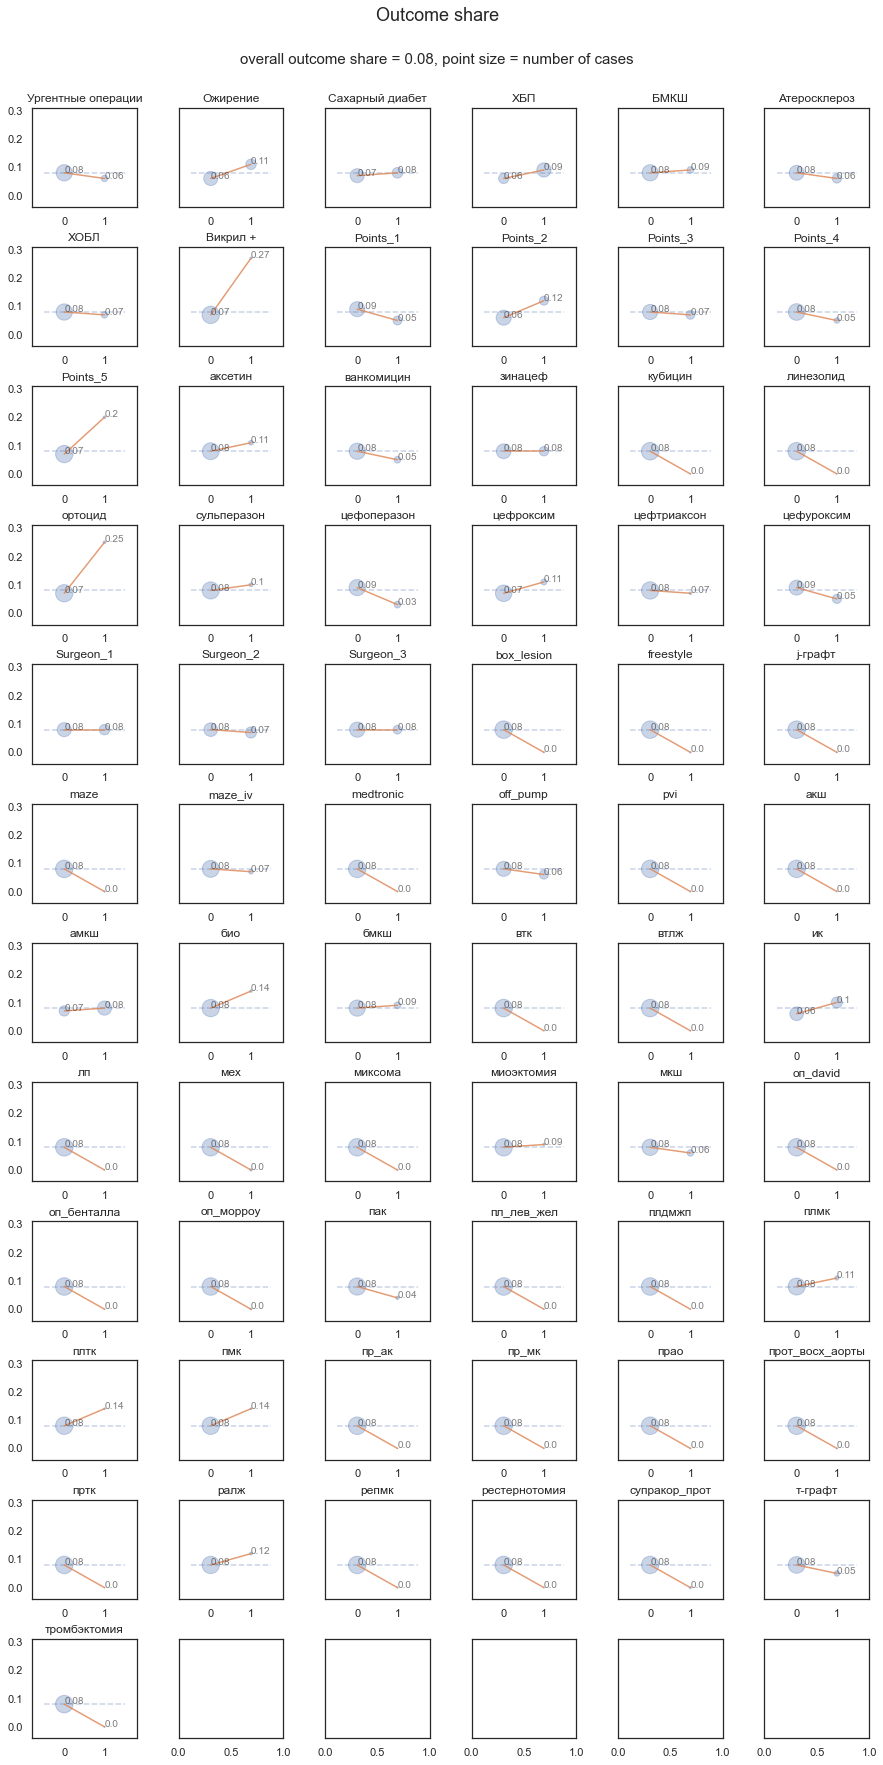

In [12]:
fig, ax = plt.subplots(rnum, cnum, sharey=True, figsize=(15, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for rn in range(rnum):
        for cn in range(cnum):
            idx = rn*(cnum) + cn
            if (idx < len(columns)):
                plot_cname_outcome_share(cname=columns[idx], ax=ax[rn, cn]) 
            else: break
        
plt.text(x=0.5, y=0.92, s="Outcome share", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.90, s= 'overall outcome share = {}, point size = number of cases'.format(round(df['ИСХОД'].mean(), 2)), 
         fontsize=15, ha="center", transform=fig.transFigure)

plt.show()